In [15]:
xstar = 0.0150
x = 0.0153
abs(x-xstar)

0.0002999999999999999

In [16]:
abs((x-xstar)/xstar)

0.019999999999999997

In [17]:
function qSol(a::Real, b::Real, c::Real)
  d=sqrt(b^2-4*a*c)
  (-b+d)/(2a),(-b-d)/(2a)
end

qSol (generic function with 1 method)

In [18]:
x64a, x64b = qSol(12.242, 42.382, 0.0012)

(-2.831413841486606e-5, -3.461987696317393)

In [19]:
x16a,x16b = qSol(Float16(12.242),Float16(42.382),Float16(0.0012))

(Float16(0.0), Float16(-3.46))

In [20]:
absErr(x::Real,xstar::Real) = abs(x-xstar)
relErr(x::Real,xstar::Real) = abs((x-xstar)/xstar)

relErr (generic function with 1 method)

In [11]:
absErr(x16a,x64a), absErr(x16b,x64b)

(2.831413841486606e-5, 0.001050196317392782)

In [12]:
relErr(x16a,x64a), relErr(x16b,x64b)

(1.0, 0.00030335067871844356)

In [15]:
using ForwardDiff, CairoMakie
CairoMakie.activate!()

In [14]:
g(x) = x^2

g (generic function with 1 method)

In [15]:
ForwardDiff.derivative(g,3)

6

In [16]:
f(x)=15x^3-143x^2+226x+280

f (generic function with 1 method)

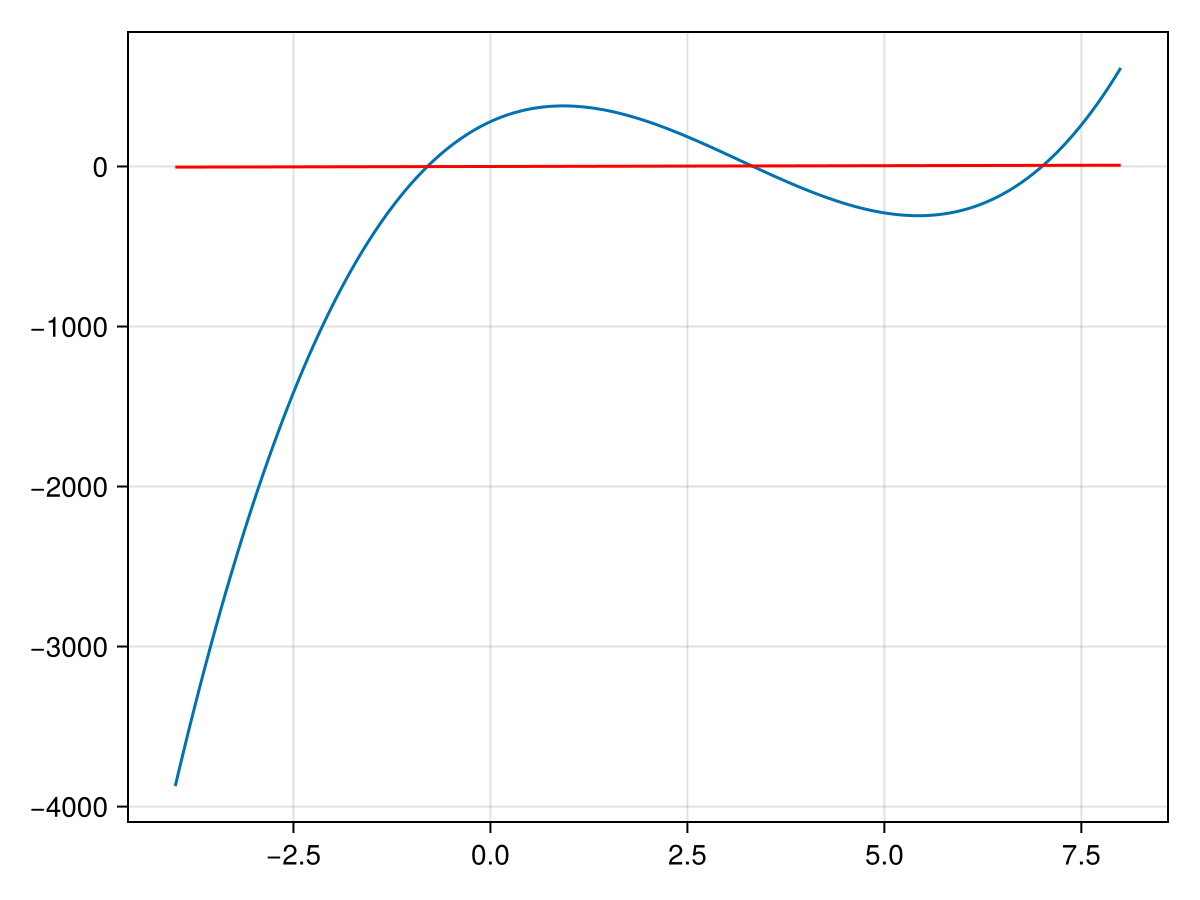

In [17]:
fig, ax = lines(-4:0.01:8,f)
lines!(-4:8,x->x, color = :red)
fig

In [18]:
save("../assets/plots/rootfinding/plot01.png", fig)

CairoMakie.Screen{IMAGE}


In [3]:
f(x) = 15x^3-143x^2+226x+280
df(x) = 45x^2-286x+226

df (generic function with 1 method)

In [4]:
x0 = 0
x1 = x0 - f(x0) / df(x0)

-1.238938053097345

In [5]:
x2 = x1-f(x1)/df(x1)

-0.8570123580970569

In [6]:
function newton(f::Function, df::Function, x0::Number)
  x1 = x0 - f(x0)/df(x0)
  while abs(x1-x0) > 1e-6 # while the two numbers are larger than 10^(-6)
    x0 = x1
    x1 = x0 - f(x0)/df(x0)
  end
  x1
end

newton (generic function with 1 method)

In [7]:
newton(f,df,0)

-0.8000000000000933

In [10]:
function newton(f::Function, df::Function, x0::Number)
  local dx = f(x0)/df(x0)
  local x1 = x0 - dx
  while abs(dx) > 1e-6
    dx = f(x1)/df(x1)
    x1 -= dx
  end
  x1
end

newton (generic function with 1 method)

In [11]:
newton(f, df, 0)

-0.8000000000000933

In [16]:
ForwardDiff.derivative(x->exp(sin(x^2+pi/x)),1.0)

0.2658898634234979

In [17]:
function newton(f::Function, x0::Number)
  local dx = f(x0)/df(x0)
  local x1 = x0 -dx
  local steps = 0
  while abs(dx)>1e-6 && steps < 10
    dx = f(x1)/ForwardDiff.derivative(f,x1)
    x1 -= dx
    steps += 1
  end
  x1
end

newton (generic function with 2 methods)

In [18]:
newton(f,0)

-0.8000000000000933

In [19]:
newton(x->x^2,2)

0.001976656626506024

In [2]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

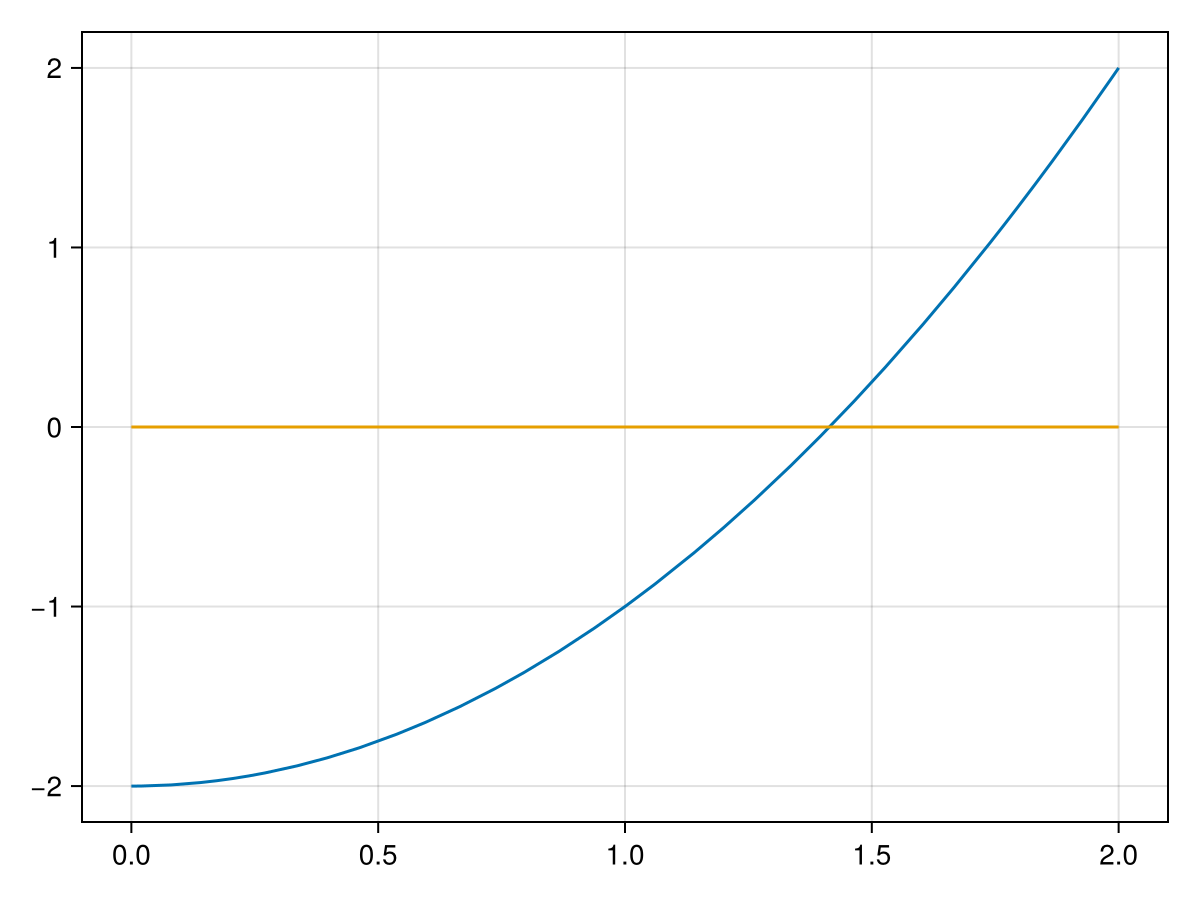

In [10]:
fig, ax = lines(0..2, x->x^2-2)
lines!(ax, 0..2,x->0)
fig

In [11]:
save("../assets/plots/rootfinding/xsq.png", fig)

CairoMakie.Screen{IMAGE}


In [12]:
function bisection(f::Function, a::Real, b::Real)
  local c
  while (b-a) > 1e-6
    c = 0.5*(a+b)  # find the midpoint
    # test if f(a) and f(c) have opposite signs to determine the new interval
    (a,b) = f(a)*f(c) < 0 ? (a,c) : (c,b)
  end
  c
end

bisection (generic function with 1 method)

In [21]:
xs = bisection(x->x^2-2, 1,2)

1.4142141342163086

In [22]:
absErr(xs,sqrt(2))

5.718432134482754e-7